In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy import io
from sklearn.metrics import classification_report

Distribution of the lables:
 {0: 180, 1: 180}





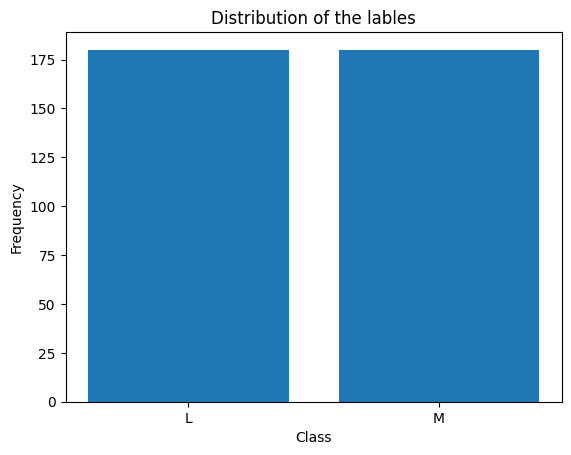

In [ ]:
mat= io.loadmat('/content/WLDataCW (3).mat')

data_only = mat['data']
labels = mat['label'].squeeze()


# Check if the data is balanced
unique_labels, counts = np.unique(labels, return_counts=True)
print("Distribution of the lables which contains 0 and 1:\n", dict(zip(unique_labels, counts)))

# Plot class distribution
plt.bar(unique_labels, counts)
print("\n\n")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['L', 'M'])
plt.title("Distribution of the lables")
plt.show()


In [ ]:

  # There are many Types of Neural Networks Activation Functions 
  # 1.Linear Activation Function  2.Sigmoid / Logistic Activation Function 

  
def SigmoiD__Actication(x): 
               return 0.5 * (1 + np.tanh(0.5 * x))

class My_LogisticRegression(): # implementation of logestic model from the scratch.


    def __init__(self, lr=0.001, n_iters=5000): #__init__ initializer of the class 
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None 
        self.bias = None
     
#A frequently used technique in machine learning models is calculating fit which is named Cost_Gradient.
# forward propagation, backward propagation and cost function 
# By modifying the model parameters to reduce the discrepancy between the projected output and the actual output, 
#it is used to train the model using the training data.

#A machine learning model object, such as a regression model or a classification model, is often invoked with the method. 
#The training data, which consists of the features and their accompanying target values, are the method's input.

#For instance, this technique modifies the coefficients of the linear equation in a linear regression model to reduce the discrepancy 
#between the expected and actual output.

    def Cost_Gradient(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = SigmoiD__Actication(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

#Assigning a class_prediction_label  of 0 to values under 0.5 and 1 to those over 0.5.
#An array is returned in 
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = SigmoiD__Actication(linear_pred)
        class_prediction_label = [0 if y<=0.5 else 1 for y in y_pred]
        return class_prediction_label
       
    def accuracy(self, y_pred, y_test):
        return np.sum(y_pred==y_test)/len(y_test)

    
def my_grid_search(X_train, y_train, X_test, y_test,learning_rates, num_iterations):
        best_accuracy = -1
        best_lr = None
        best_iter = None
            
        for lr in learning_rates:
                for n_iter in num_iterations:
                    clf = My_LogisticRegression(lr, n_iter)
                    clf.Cost_Gradient(X_train, y_train)
                    accuracy = clf.accuracy(y_pred, y_test)
                    
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_lr = lr
                        best_iter = n_iter
            
        print("Best Accuracy: {:.2f}%".format(best_accuracy*100))
        print("Best Learning Rate: {}".format(best_lr))
        print("Best Number of Iterations: {}".format(best_iter))
    
        return best_accuracy, best_iter
    #It should be determined which precision is the best during iteration.
        #It is important to check which iteration has the highest or best learning rate.
        #With iteration, it is obvious that the first iteration, which is 100, would be picked as the best by setting a list of iterations such as 100, 500, and 1000. So, it is preferable to check with more iterations.
        #The first and lowest iteration in this section would be the correct response.



In [30]:
#The syllabus states that the primary paper of EEG-Datasets
#A signal can be transformed from the time domain to the frequency domain mathematically using the Fourier transform.

req_bands = {'delta': (1, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30), 'gamma': (30, 45)}
band_indices = {}

#5 frequency bands with values and related indices are defined in this section of code.
#fr_band is a dict so for searching key and values and specially for minimum and maximum of the bands 
for band, (fmin, fmax) in req_bands.items():
    idx_min = int(fmin / (256/512))
    idx_max = int(fmax / (256/512))
    band_indices[band] = (idx_min, idx_max)

X_all = np.zeros((360, 62*5))  #check the dimensions.

for i in range(360): #This matrix should construct a zero matrix in this section of the code, then convert 1 to 0 and 0 to 1.
    sample = data_only[:, :, i]
    sample_features = np.zeros((62, 5))
    for j, (fmin, fmax) in enumerate(req_bands.values()):
        idx_min, idx_max = band_indices[list(req_bands.keys())[j]]
        sample_fft = np.fft.fft(sample, axis=1)
        sample_power = np.abs(sample_fft[:, idx_min:idx_max])**2
        mean_power = np.mean(sample_power, axis=1)
        sample_features[:, j] = mean_power
    X_all[i, :] = np.reshape(sample_features, (-1,))# fast Fourier transform


y_matrix = np.zeros((360, 2))
for i, label in enumerate(labels):
    if label == 0:
        y_matrix[i, 0] = 1
    else:
        y_matrix[i, 1] = 1
print(f'the y shape is :{y_matrix.shape}')


np.random.seed(42) #shifting the order 
idx = np.random.permutation(360)
X_all = X_all[idx, :]
labels = labels[idx]



train_size = 288 #This section should define train size, and the test size for train size is 4 out of 5 (kfold=5).
test_size = 72 #The test size rating is 1 out of 5.


#five-fold cross-validation (this part was not optional !)
# creating the matrix for prediction and the test data
kf = KFold(n_splits=5)
y_preds = []
y_tests = []
# split the data for training and testing.
for train_index, test_index in kf.split(X_all):
    
    X_train_all, X_test_all = X_all[train_index], X_all[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # according to the comment which is mentioned above split it into 4 train sets
    X_train_sets = np.split(X_train_all, 4, axis=0)
    
    # keeping the  training data (it should be a vector )
    X_train = np.zeros((train_size, 62*5))
    
    # data sets +  data matrix
    for i, X_train_set in enumerate(X_train_sets):
        X_train[i*train_size//4:(i+1)*train_size//4, :] = X_train_set
    
    # reshape -> vectors
    X_test = np.reshape(X_test_all, (test_size, -1))


# Define logistic regression model
    lr_model = My_LogisticRegression(lr=0.001)

    # Perform grid search with 5-fold cross-validation
    #grid_search = GridSearchCV(lr_model, param_grid=param_grid, cv=5, n_jobs=-1)
    lr_model.Cost_Gradient(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy score
    print("Accuracy: ", accuracy)                  




the y shape is :(360, 2)
Accuracy:  0.5138888888888888
Accuracy:  0.3333333333333333
Accuracy:  0.5833333333333334
Accuracy:  0.4166666666666667
Accuracy:  0.4861111111111111


------------------------------------------------


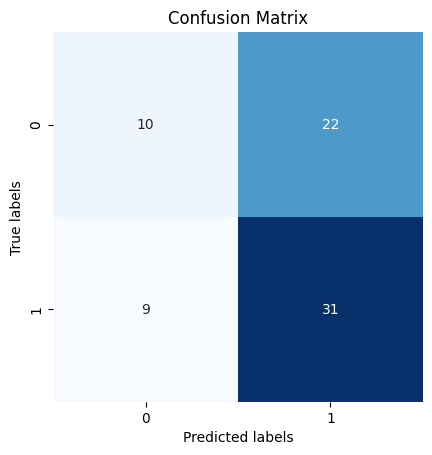

--------------------------------------------


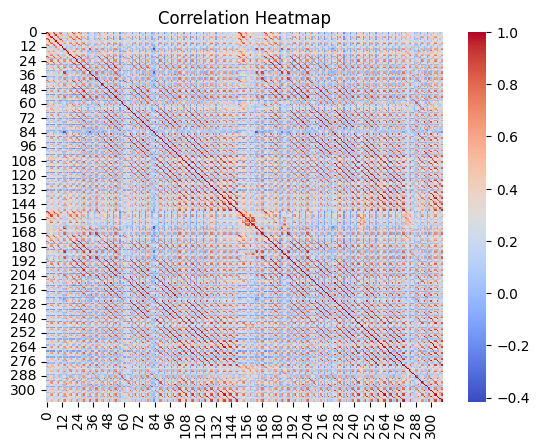

In [ ]:
    # generate confusion matrix
    print("------------------------------------------------")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, square=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    print("--------------------------------------------")

    #correlation heatmap
    corr = np.corrcoef(X_all.T)
    sns.heatmap(corr, cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()
    clf = My_LogisticRegression(lr=0.01)
    clf .Cost_Gradient(X_train,y_train)
    y_pred = clf .prediction_function(X_test)
    print("\n\n")


In [ ]:

    def My_accuracy(y_pred, y_test):
        return np.sum(y_pred==y_test)/len(y_test)

    acc = My_accuracy(y_pred, y_test)
    print("Accuracy:",acc)

    # loop-> trains and tests the model
    report = classification_report(y_test, y_pred)
    print(report)
    l_rate= [0.001, 0.01, 0.1, 1] # learning rates.
    num_it = [100, 500, 1000] #list of number of iterations

    Max_lr, best_of_All_iterations = my_grid_search(X_train, y_train, X_test, y_test, l_rate,num_it)
    if accuracy > Max_lr:
          Max_lr = accuracy
    print("Accuracy: {:.2f}".format(accuracy))

print("Best accuracy: {:.2f}".format(Max_lr))

Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

           0       0.22      0.07      0.11        27
           1       0.60      0.84      0.70        45

    accuracy                           0.56        72
   macro avg       0.41      0.46      0.41        72
weighted avg       0.46      0.56      0.48        72

Best Accuracy: 55.56%
Best Learning Rate: 0.001
Best Number of Iterations: 100
Accuracy: 0.56
Best accuracy: 0.56
